<a href="https://colab.research.google.com/github/cequintero/deep_learning/blob/main/Clasificador_MNIST_fashion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
%tensorflow_version 2.x

import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)


2.6.0


# Carga de datos

In [18]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Escalado de datos entre 0 y 1

In [19]:
train_images = train_images.astype('float32')
test_images =test_images.astype('float32')

train_images = train_images / 255.0
test_images = test_images / 255.0

# comprobar los datos

print("train_images.shape:", train_images.shape)
print("len(train_labels:", len(train_labels))
print("test_images.shape:", test_images.shape)
print("len(test_labels:", len(test_labels))

train_images.shape: (60000, 28, 28)
len(train_labels: 60000
test_images.shape: (10000, 28, 28)
len(test_labels: 10000


Impresion muestra de 50 imagenes

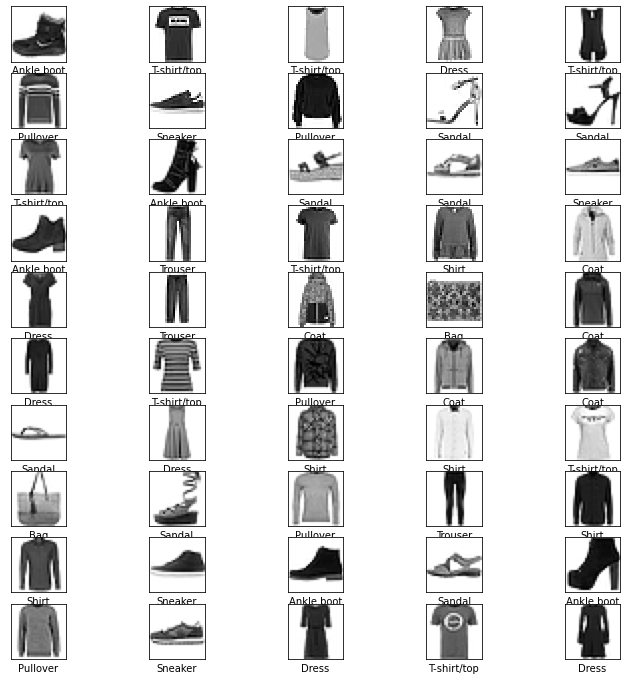

In [20]:
plt.figure(figsize=(12,12))
for i in range(50):
  plt.subplot(10,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap = plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

# Definicion del modelo

In [21]:
from keras.models import Sequential
from keras.layers import Flatten
from keras.layers import Dense

model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))

model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


# Configuracion del modelo

In [22]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Entrenamiento del modelo

In [23]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0315 - accuracy: 0.7189
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5867 - accuracy: 0.8000
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4967 - accuracy: 0.8281
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4535 - accuracy: 0.8431
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4302 - accuracy: 0.8503


# Evaluacion y mejora

In [24]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy"', test_acc)

313/313 [==============================] - 1s 1ms/step - loss: 0.4635 - accuracy: 0.8371
Test accuracy" 0.8371000289916992


predicciones

In [25]:
predictions = model.predict(test_images)

print(predictions[5])
print(np.argmax(predictions[5]))

[1.0214858e-02 9.6850967e-01 7.9192594e-03 4.7042575e-03 5.2163433e-03
 9.4025127e-06 3.2646218e-03 9.8414939e-06 1.5665484e-05 1.3612362e-04]
1


Presentacion grafica de datos

In [26]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                       100*np.max(predictions_array),
                                       class_names[true_label]),
                                       color = color)
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#007700")
  plt.ylim([0,1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('black')

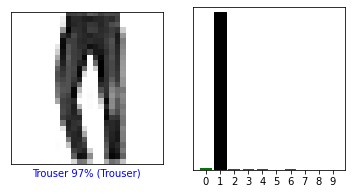

In [27]:
i = 5
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

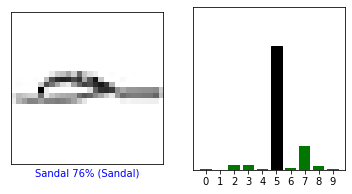

In [28]:
i = 8
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

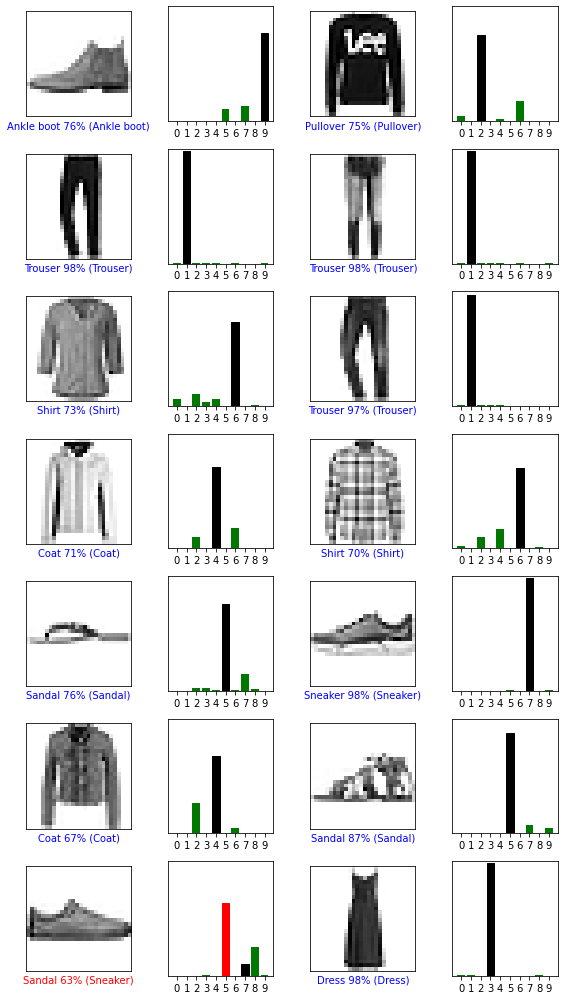

In [29]:
num_rows = 7
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize= (2*2*num_cols, 2*num_rows))
for i in range (num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()